In [539]:
import re
import numpy as np
import pandas as pd
import time
import os
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score 
#from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import operator
from sklearn import metrics
import seaborn as sns
import glob
import openpyxl
from pathlib import Path

In [556]:
print("Reading Paths")
feature='APGDF';
train_dataset_real = '/scratch/projects/smiles/Multi_Features/Awais_new_vsdc/VSDC/'+ feature + '/training/0PR/'
train_dataset_spoof = '/scratch/projects/smiles/Multi_Features/Awais_new_vsdc/VSDC/'+ feature + '/training/1PR/'
test_dataset_real = '/scratch/projects/smiles/Multi_Features/Awais_new_vsdc/VSDC/'+ feature +'/testing/0PR/'
test_dataset_spoof = '/scratch/projects/smiles/Multi_Features/Awais_new_vsdc/VSDC/'+ feature +'/testing/1PR/'



Reading Paths


In [557]:
import glob, os

train_name_r= []
train_names_r= []
train_labels= []
train_names= []
train_name_sp = []
n_label_sp = []
n_label_r = []
train_names_sp = []


os.chdir("/scratch/projects/smiles/Multi_Features/Awais_new_vsdc/VSDC/"+ feature +"/training/0PR/")
for file in sorted(glob.glob("*.xlsx")):
    n_label_r=file.split('.')
    train_name_r=n_label_r[0]
    train_names_r.append(train_name_r)
    

os.chdir("/scratch/projects/smiles/Multi_Features/Awais_new_vsdc/VSDC/"+ feature +"/training/1PR/")
for file in sorted(glob.glob("*.xlsx")):
    #print(file)
    n_label_sp=file.split('.')
    train_name_sp=n_label_sp[0]
    train_names_sp.append(train_name_sp)
    
    
print('length of real samples', len(train_names_r))
print('length of spoof samples', len(train_names_sp))

totallength = len(train_names_r) + len(train_names_sp)

    
print(" Creating Feature Space ")
train_features_space = np.zeros((totallength, 60), dtype='float')
print(train_features_space.shape)

train_features_sp = []*totallength

print(" Reading & Creating training Features and Labels")
try:
    for i in range(len(train_names_r)):
        #print(train_dataset_real+train_names_r[i]+'.xlsx')
        tr_features = pd.read_excel(train_dataset_real+train_names_r[i]+'.xlsx', engine='openpyxl', header=None)
        tr_features = tr_features.to_numpy()
        train_features_space[i]=tr_features 
        train_labels.append(0) # 0=real
except ValueError:
    print('training real file containing issues: ')
    print(train_dataset_real+train_names_r[i]+'.xlsx')
    raise Exception 
    pass

change_loop = i + 1
print('Total number of training real labels ', len(train_labels))

try:
    for i in range(len(train_names_sp)):
        #print(train_dataset_spoof+train_names_sp[i]+'.xlsx')
        ts_features = pd.read_excel(train_dataset_spoof+train_names_sp[i]+'.xlsx', engine='openpyxl', header=None)
        ts_features = ts_features.to_numpy()
        train_features_space[change_loop+i]=ts_features 
        train_labels.append(1) # 1=spoof
except ValueError: 
        print('training spoof file containing issues: ')
        print(train_dataset_spoof+train_names_sp[i]+'.xlsx')
        pass


print('Total number of training samples ',len(train_features_space))
print('Total number of training labels ', len(train_labels))
# print('Training feature shape',train_features_sp.shape)

length of real samples 1008
length of spoof samples 3704
 Creating Feature Space 
(4712, 60)
 Reading & Creating training Features and Labels
Total number of training real labels  1008
Total number of training samples  4712
Total number of training labels  4712


In [558]:
# print('Total number of training samples ',len(train_features_space))
# print(train_features_space[4711])

In [559]:
print('Preparing testing features and labels')

import glob, os

test_name_r= []
test_names_r= []
test_labels= []
test_names= []
test_name_sp = []
n_label_sp = []
n_label_r = []
test_names_sp = []

os.chdir("/scratch/projects/smiles/Multi_Features/Awais_new_vsdc/VSDC/"+ feature +"/testing/0PR/")
for file in glob.glob("*.xlsx"):
    n_label_r=file.split('.')
    test_name_r=n_label_r[0]
    #print(test_name_r)
    test_names_r.append(test_name_r)
   

os.chdir("/scratch/projects/smiles/Multi_Features/Awais_new_vsdc/VSDC/"+ feature +"/testing/1PR/")
for file in glob.glob("*.xlsx"):
    n_label_sp=file.split('.')
    test_name_sp=n_label_sp[0]
    test_names_sp.append(test_name_sp)
    
    
print('length of real samples', len(test_names_r))
print('length of spoof samples', len(test_names_sp))    

totallength1 = len(test_names_r) + len(test_names_sp)
test_features_sp = []*totallength1

print(" Creating Feature Space ")
test_features_space = np.zeros((totallength1, 60), dtype='float')
print(test_features_space.shape)

print(" Reading & Creating training Features and Labels")
try:
    for i in range(len(test_names_r)):
        t_features = pd.read_excel(test_dataset_real+test_names_r[i]+'.xlsx', engine='openpyxl', header=None)
        t_features = t_features.to_numpy()
        test_features_space[i]=t_features 
        test_labels.append(0)
except ValueError:
    print('training real file containing issues: ')
    print(test_dataset_real+test_names_r[i]+'.xlsx')
    pass

change_loop=i+1

try:
    for i in range(len(test_names_sp)):
#       len(train_names)
#       print(train_dataset_path+train_names[i]+'.xlsx')
        ts_features = pd.read_excel(test_dataset_spoof+test_names_sp[i]+'.xlsx', engine='openpyxl', header=None)
        ts_features = ts_features.to_numpy()
        test_features_space[change_loop+i]=ts_features 
        test_labels.append(1)
except ValueError:
    print('testing spoof file containing  issues: ')
    print(test_dataset_spoof+test_names_sp[i]+'.xlsx')
    pass
        
        
print('Total number of training samples ',len(test_features_space))
print('Total number of training labels ', len(test_labels))

Preparing testing features and labels
length of real samples 678
length of spoof samples 2474
 Creating Feature Space 
(3152, 60)
 Reading & Creating training Features and Labels
Total number of training samples  3152
Total number of training labels  3152


In [560]:
# print(test_features_space[3151])

In [561]:
training_labels = np.array(train_labels)
Evaluation_labels = np.array(test_labels)
training_features = np.array(train_features_space)
Evaluation_features = np.array(test_features_space)
print(training_labels.shape)
print(training_features.shape)
print(Evaluation_labels.shape)
print(Evaluation_features.shape)
print("setting train test Data")
#X_train, X_test, y_train, y_test = train_test_split(train_features_space, train_labels, train_size = 0.70)
X_train=training_features
X_test=Evaluation_features
y_train=training_labels
y_test=Evaluation_labels

(4712,)
(4712, 60)
(3152,)
(3152, 60)
setting train test Data



Accuracy of SVM(linear) classifier on test set: 0.89
F1-score of SVM(linear) classifier on test set: 0.93
Precision of SVM(linear) classifier on test set: 0.89
Recall of SVM(linear) classifier on test set: 0.98


Confusion Matrix: 
 [[ 383  295]
 [  50 2424]]


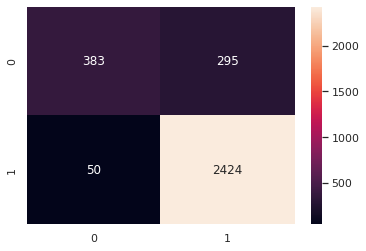

In [562]:
model_svm = SVC(kernel="linear",probability=True)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
# probs_svm = model_svm.predict_proba(X_test)
# preds_svm = probs_svm[:,1]
# fpr_svm, tpr_svm, threshold = metrics.roc_curve(y_test, preds_svm)
# roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
print('\nAccuracy of SVM(linear) classifier on test set: {:.2f}'.format(model_svm.score(X_test, y_test)))
print("F1-score of SVM(linear) classifier on test set: {:.2f}".format(metrics.f1_score(y_test, y_pred_svm)))
print("Precision of SVM(linear) classifier on test set: {:.2f}".format(metrics.precision_score( y_test,y_pred_svm)))
print("Recall of SVM(linear) classifier on test set: {:.2f}\n".format(metrics.recall_score(y_test,y_pred_svm)))


sns.set(font_scale=1.0)
conf_mtx_nb_svm = metrics.confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_mtx_nb_svm, annot=True, fmt='g')
print('\nConfusion Matrix: \n', conf_mtx_nb_svm )


In [563]:
sns.set(font_scale=1.0)
conf_mtx_nb_svm = metrics.confusion_matrix(y_test, y_pred_svm)
#sns.heatmap(conf_mtx_nb_svm, annot=True, fmt='g')
print('\nConfusion Matrix: \n', conf_mtx_nb_svm )


print('classification Report')
report=classification_report(y_test, y_pred_svm)
print(report)

accuracy=accuracy_score(y_test, y_pred_svm)
precision, recall, fscore, support = score(y_test, y_pred_svm)
print('classification Report END')

fpr, tpr, threshold = roc_curve(y_test, y_pred_svm)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]

print('Hand-crafted Features: ',feature)
print('Score Report Start')
print('EER: {}'.format(EER))
print('accuracy: {}'.format(accuracy))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('Score Report End')


Confusion Matrix: 
 [[ 383  295]
 [  50 2424]]
classification Report
              precision    recall  f1-score   support

           0       0.88      0.56      0.69       678
           1       0.89      0.98      0.93      2474

    accuracy                           0.89      3152
   macro avg       0.89      0.77      0.81      3152
weighted avg       0.89      0.89      0.88      3152

classification Report END
Hand-crafted Features:  APGDF
Score Report Start
EER: 0.4351032448377581
accuracy: 0.8905456852791879
precision: [0.88452656 0.89150423]
recall: [0.56489676 0.97978981]
fscore: [0.68946895 0.93356441]
support: [ 678 2474]
Score Report End
